<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/%EB%B6%84%EB%A5%98%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X, Y = load_iris(return_X_y = True)

In [8]:
iris_df = pd.DataFrame(X, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

In [9]:
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df['class'] = Y

In [11]:
iris_df['class'] = iris_df['class'].map({0:'setosa', 1:'versicolour', 2:'virginica'})

In [12]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris_df['class'].value_counts()

setosa         50
versicolour    50
virginica      50
Name: class, dtype: int64

In [14]:
iris_df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

<Axes: xlabel='class', ylabel='sepal length'>

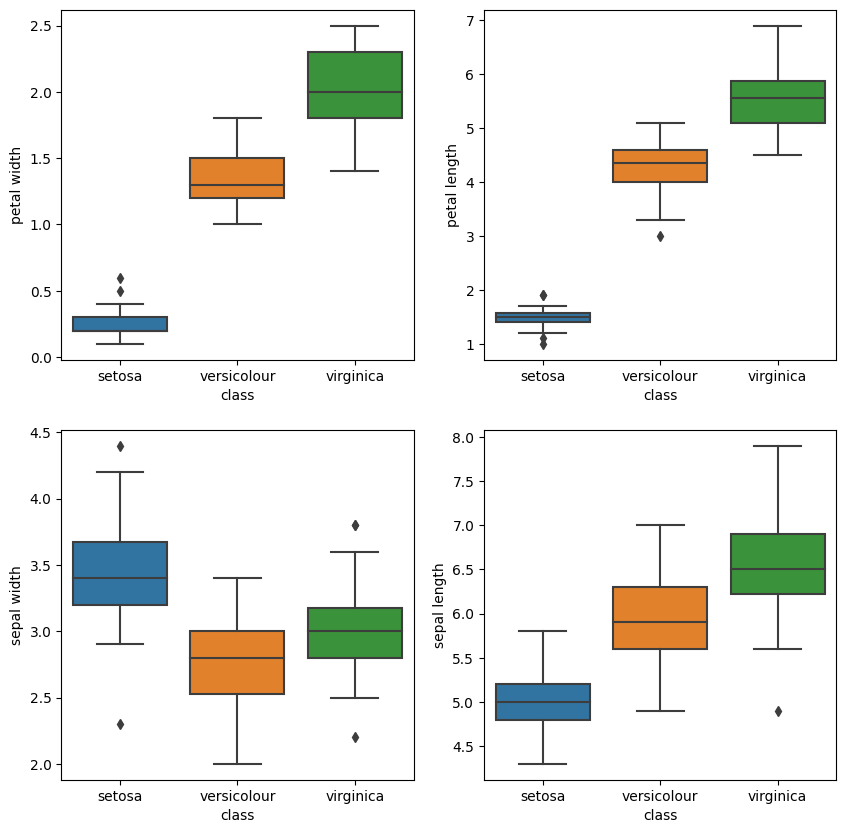

In [29]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sn.boxplot(x = 'class', y = 'petal width', data = iris_df, ax = ax[0,0])
sn.boxplot(x = 'class', y = 'petal length', data = iris_df, ax = ax[0,1])
sn.boxplot(x = 'class', y = 'sepal width', data = iris_df, ax = ax[1,0])
sn.boxplot(x = 'class', y = 'sepal length', data = iris_df, ax = ax[1,1])

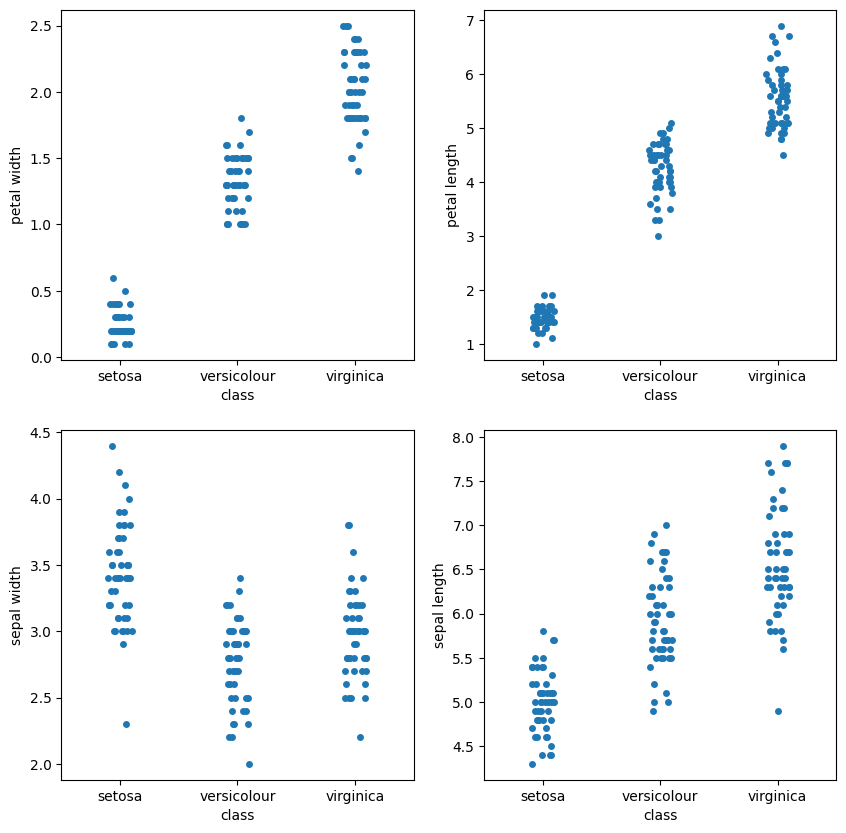

In [15]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

sn.stripplot(x = 'class', y = 'petal width', data = iris_df, ax = ax[0,0])
sn.stripplot(x = 'class', y = 'petal length', data = iris_df, ax = ax[0,1])
sn.stripplot(x = 'class', y = 'sepal width', data = iris_df, ax = ax[1,0])
sn.stripplot(x = 'class', y = 'sepal length', data = iris_df, ax = ax[1,1])
plt.show()

In [16]:
import statsmodels.api as sm

In [17]:
from sklearn.datasets import make_classification

In [18]:
x0, y = make_classification(n_samples = 100, n_features = 1, n_redundant = 0, n_informative = 1,
                           n_classes = 2, n_clusters_per_class = 1, random_state = 9)

In [30]:
x0

array([[ 1.35483598],
       [-1.47872301],
       [ 0.96916836],
       [ 0.93928102],
       [-2.68992794],
       [ 1.73120302],
       [-1.00102774],
       [ 1.01341949],
       [ 1.64601925],
       [ 0.75101625],
       [ 1.08712407],
       [ 0.64926288],
       [-0.87287175],
       [ 0.64631233],
       [-2.20875941],
       [-1.35276938],
       [-1.39936489],
       [-3.27619371],
       [-0.98805643],
       [ 1.01897479],
       [ 0.7952222 ],
       [ 1.18159978],
       [-1.96640407],
       [ 2.29196318],
       [ 0.48687368],
       [-0.77686564],
       [-0.53654153],
       [ 0.03470228],
       [ 1.47730651],
       [-1.30446909],
       [-2.61325841],
       [ 1.21242898],
       [ 0.54290844],
       [ 1.6865157 ],
       [-0.39140445],
       [ 0.98785076],
       [-0.86065461],
       [-2.77747791],
       [ 0.7989727 ],
       [-1.65592488],
       [-0.947844  ],
       [-0.53809706],
       [ 0.87912062],
       [ 1.00011845],
       [ 0.5194745 ],
       [ 0

In [31]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

<ipython-input-32-5c34cc6b9f29>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x0[y == 0, :], label = 'y = 0', hist = True)
<ipython-input-32-5c34cc6b9f29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(x0[y == 1, :], label = 'y = 1', hist = True)


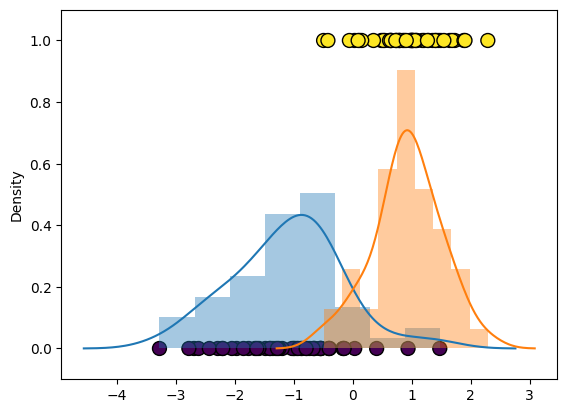

In [32]:
plt.scatter(x0, y, c = y, s = 100, edgecolor = 'k')
sn.distplot(x0[y == 0, :], label = 'y = 0', hist = True)
sn.distplot(x0[y == 1, :], label = 'y = 1', hist = True)
plt.ylim(-0.1, 1.1)
plt.show()

In [34]:
x = sm.add_constant(x0)

In [35]:
x

array([[ 1.        ,  1.35483598],
       [ 1.        , -1.47872301],
       [ 1.        ,  0.96916836],
       [ 1.        ,  0.93928102],
       [ 1.        , -2.68992794],
       [ 1.        ,  1.73120302],
       [ 1.        , -1.00102774],
       [ 1.        ,  1.01341949],
       [ 1.        ,  1.64601925],
       [ 1.        ,  0.75101625],
       [ 1.        ,  1.08712407],
       [ 1.        ,  0.64926288],
       [ 1.        , -0.87287175],
       [ 1.        ,  0.64631233],
       [ 1.        , -2.20875941],
       [ 1.        , -1.35276938],
       [ 1.        , -1.39936489],
       [ 1.        , -3.27619371],
       [ 1.        , -0.98805643],
       [ 1.        ,  1.01897479],
       [ 1.        ,  0.7952222 ],
       [ 1.        ,  1.18159978],
       [ 1.        , -1.96640407],
       [ 1.        ,  2.29196318],
       [ 1.        ,  0.48687368],
       [ 1.        , -0.77686564],
       [ 1.        , -0.53654153],
       [ 1.        ,  0.03470228],
       [ 1.        ,

In [36]:
model_glm = sm.Logit(y, x0)

In [37]:
result_glm = model_glm.fit()

Optimization terminated successfully.
         Current function value: 0.227866
         Iterations 8


In [38]:
result_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Wed, 19 Jul 2023   Pseudo R-squ.:                  0.6713
Time:                        02:35:29   Log-Likelihood:                -22.787
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.2339      0.633      5.109      0.000       1.993       4.475
==============================================================================
"""

In [50]:
y_pred = result_glm.predict(x0)

In [51]:
y_pred

array([9.87646753e-01, 8.30922861e-03, 9.58281425e-01, 9.54241635e-01,
       1.66731010e-04, 9.96310397e-01, 3.77886582e-02, 9.63641763e-01,
       9.95145893e-01, 9.18990741e-01, 9.71129854e-01, 8.90869370e-01,
       5.61054633e-02, 8.89938240e-01, 7.89823939e-04, 1.24350531e-02,
       1.07142538e-02, 2.50430855e-05, 3.93438386e-02, 9.64265984e-01,
       9.29015920e-01, 9.78567416e-01, 1.72783447e-03, 9.99396393e-01,
       8.28424388e-01, 7.49999081e-02, 1.49933533e-01, 5.28026533e-01,
       9.91652940e-01, 1.45068025e-02, 2.13636635e-04, 9.80561618e-01,
       8.52671857e-01, 9.95739188e-01, 2.19983342e-01, 9.60631015e-01,
       5.82348348e-02, 1.25624203e-04, 9.29811605e-01, 4.70179543e-03,
       4.45643101e-02, 1.49293514e-01, 9.44955167e-01, 9.62104276e-01,
       8.42895178e-01, 5.26783302e-01, 1.09143473e-01, 9.97768344e-01,
       5.92780115e-01, 2.11001531e-01, 6.11171126e-04, 3.45656905e-02,
       9.15323308e-01, 3.78537477e-01, 2.06364377e-02, 9.84665687e-01,
      

In [54]:
y_pred = list(y_pred.round())

In [55]:
y_pred

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [44]:
pred = list(map(round, y_pred))

In [45]:
pred

[1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0]

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [60]:
confusion_matrix(y, y_pred, labels = [1, 0])

array([[47,  3],
       [ 4, 46]])

In [63]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.92      0.94      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [65]:
fpr, tpr, threshold = roc_curve(y, y_pred)

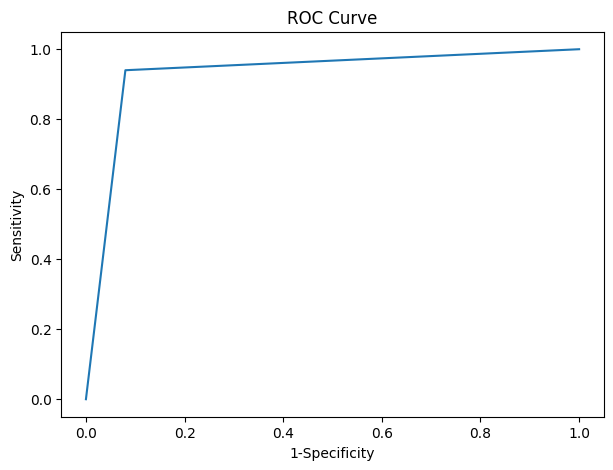

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [69]:
auc(fpr, tpr)

0.9299999999999999

In [70]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.3, random_state = 156)

In [71]:
data_class = DecisionTreeClassifier(random_state = 100, criterion = 'entropy')

In [72]:
data_class.fit(x_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [73]:
data_class.score(x_tr, y_tr)

1.0

In [74]:
data_class

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [75]:
data_class.score(x_te, y_te)

0.9333333333333333

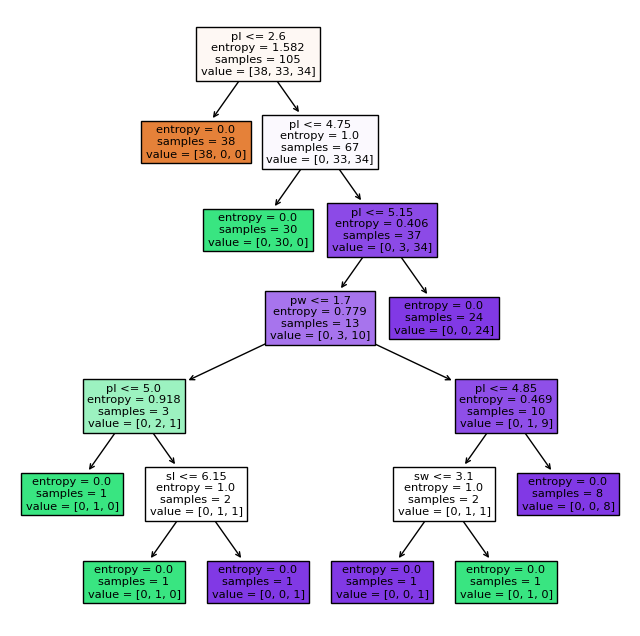

In [78]:
plt.figure(figsize = (8, 8))
plot_tree(data_class, feature_names = ['sl', 'sw', 'pl', 'pw'], filled = True)
plt.show()

In [86]:
from sklearn.metrics import f1_score

In [88]:
predict = data_class.predict(x_te)
print(y_pred)
print(predict)

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]
[2 0 1 2 0 1 2 2 0 2 2 0 2 1 1 2 0 0 2 1 1 1 1 2 0 1 2 0 0 2 0 0 1 0 2 1 2
 1 1 2 1 1 1 1 1]


In [89]:
print(classification_report(y_te, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.94      0.91        17
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [95]:
metrics.precision_score(y_te, predict, average = 'macro')

0.9407407407407407

In [96]:
f1_score(y_te, predict, average = 'weighted')

0.9332104454685101

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [99]:
knn.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=4)